In [1]:
#Importing necessary Python Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st

**LOADING FILES REQUIRED:**

In [2]:
#Loading cleaned train dataset
train_set = pd.read_csv('/content/drive/MyDrive/DataSets/train_set_cleaned.csv')
train_set.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,34.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
#Loading cleaned sessions dataset
sessions_dataset = pd.read_csv('/content/drive/MyDrive/DataSets/sessions_cleaned.csv')
sessions_dataset.head(5)

,user_id,secs_elapsed,activity
0,d1mm9tcy42,"[319.0, 67753.0, 301.0, 22141.0, 435.0, 7703.0...","['lookup_no_detail_no_type', 'search_results_v..."
1,yo8nz8bqcq,"[2739.0, 0.0, 115983.0, 20285.0, 3255.0, 47308...","['dashboard_dashboard_view', 'create_create_us..."
2,4grx6yxeby,"[65080.0, 0.0, 59801.0, 1000.0, 1624.0, 5134.0...","['verify_-unknown-_-unknown-', 'create_create_..."
3,ncf87guaf0,"[2204.0, 10834.0, 575.0, 578.0, 12407.0, 829.0...","['lookup_no_detail_no_type', 'show_p3_view', '..."
4,4rvqpxoh3h,"[375.0, 728.0, 0.0, 187.0, 154.0, 204.0, 21.0,...","['campaigns_-unknown-_-unknown-', 'active_-unk..."


We Know that only about 35% of train users' session activity is available. We can't afford to waste 65% of the data just because there is no session data. So, we would be joining the train and session dataset using left join.

**MERGING PREPROCESSED SESSIONS DATASET WITH TRAIN USERS DATASET :**

In [4]:
#Merging Train dataset with Sessions dataset using 'Left Join'
train_session = train_set.merge(sessions_dataset, left_on='id', right_on='user_id', how='left')
train_session.drop(['user_id'],axis=1,inplace=True)

In [5]:
train_session.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed,activity
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,34.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,direct,direct,untracked,Web,Windows Desktop,IE,US,NaN,NaN
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Chrome,US,NaN,NaN


#**5. FEATURE ENGINEERING AND EDA :**

##**FEATURE EXTRACTION**

####**EXTRACTING FEATURES RELATED TO DATE OF ACCOUNT CREATED AND TIMESTAMP FIRST ACTIVE**

In [ ]:
#Converting the Date of account created and Timestamp First Active feature columns into proper date format:

train_session['date_account_created'] = pd.to_datetime(train_session['date_account_created'])
train_session['timestamp_first_active'] = pd.to_datetime(train_session['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [ ]:
train_session.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed,activity
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,34.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,direct,direct,untracked,Web,Windows Desktop,IE,US,NaN,NaN
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Chrome,US,NaN,NaN


In [ ]:
#Extracting month of account created, weekday of account creation and year of account creation from Date of account created feature as new features:

train_session['month_account_created'] = pd.DatetimeIndex(train_session['date_account_created']).month
train_session['DayOfWeek_account_created']= pd.DatetimeIndex(train_session['date_account_created']).weekday
train_session['year_account_created']= pd.DatetimeIndex(train_session['date_account_created']).year

In [ ]:
#Extracting lag between date of account created and first active timestamp and converting it into secs. 

train_session['time_lag'] = (train_session['timestamp_first_active']-train_session['date_account_created'])
train_session['time_lag'] = train_session['time_lag'].apply(lambda x:x.total_seconds())

In [ ]:
train_session.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed,activity,month_account_created,DayOfWeek_account_created,year_account_created,time_lag
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,34.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,6,0,2010,-40246025.0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,5,2,2011,-63180711.0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,direct,direct,untracked,Web,Windows Desktop,IE,US,NaN,NaN,9,1,2010,-41042833.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN,12,0,2011,-66074311.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Chrome,US,NaN,NaN,9,1,2010,-24169735.0


####**EDA ON EXTRACTED FEATURES FROM DATE OF ACCOUNT CREATED:**

#####**MONTH OF ACCOUNT CREATED**

Text(0, 0.5, 'No. of Users')

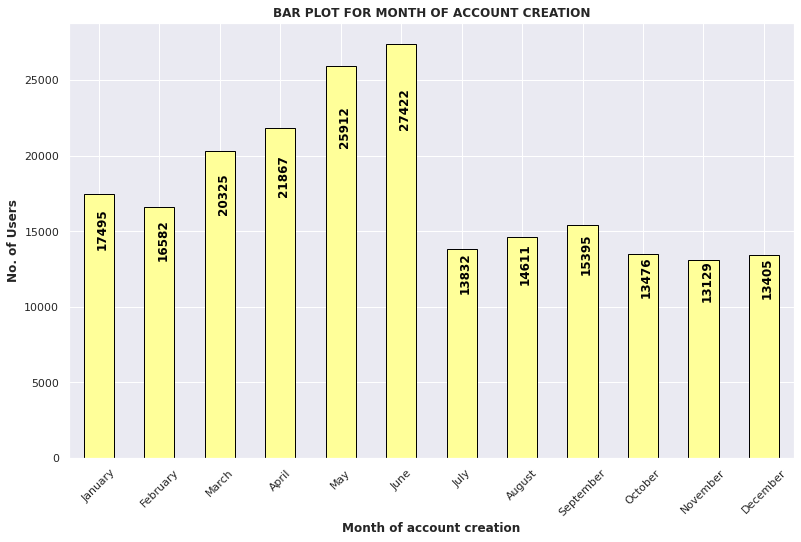

In [ ]:
#Plot that shows the distribution of users w.r.t their month of account creation:

plt.figure(figsize = (13,8))
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
x = pd.Series(list(zip(*sorted(list(zip(train_session.month_account_created.value_counts().index,train_session.month_account_created.value_counts())))))[1])
m = x.index
sns.set(style="darkgrid")

ax_cd = x.plot(kind='bar', color = '#FFFF99',rot=45,edgecolor='black')
for p in ax_cd.patches:
    ax_cd.annotate(str(p.get_height()), (p.get_x()+0.2, p.get_height() * (0.8)),rotation=90,color='black',fontweight="bold")
plt.title('BAR PLOT FOR MONTH OF ACCOUNT CREATION',fontweight="bold")
plt.xlabel('Month of account creation',fontweight="bold")
plt.xticks(m, labels, rotation=45)
plt.ylabel('No. of Users',fontweight="bold")


**Observation:**

* We observe that there are more bookings during May and June when compared to other months. 

* There are more accounts created for first 6 months than the later 6 months.
 

#####**DAY OF WEEK OF ACCOUNT CREATED**

Text(0, 0.5, 'No. of Users')

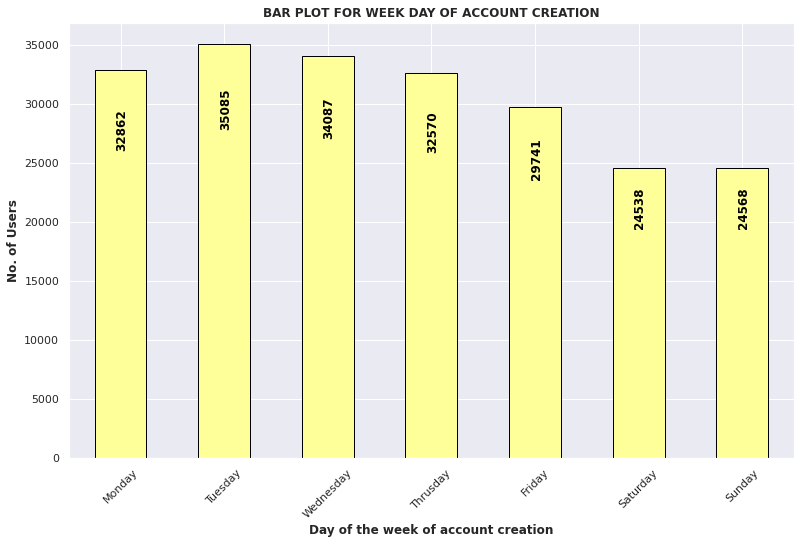

In [ ]:
#Plot that shows the distribution of users w.r.t their day of week of account creation:

plt.figure(figsize = (13,8))
labels = ['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday']
x = pd.Series(list(zip(*sorted(list(zip(train_session.DayOfWeek_account_created.value_counts().index,train_session.DayOfWeek_account_created.value_counts())))))[1])
m = x.index
sns.set(style="darkgrid")

ax_cd = x.plot(kind='bar', color = '#FFFF99',rot=45,edgecolor='black')
for p in ax_cd.patches:
    ax_cd.annotate(str(p.get_height()), (p.get_x()+0.2, p.get_height() * (0.8)),rotation=90,color='black',fontweight="bold")
plt.title('BAR PLOT FOR WEEK DAY OF ACCOUNT CREATION',fontweight="bold")
plt.xlabel('Day of the week of account creation',fontweight="bold")
plt.xticks(m, labels, rotation=45)
plt.ylabel('No. of Users',fontweight="bold")


**Observation:**

* There are more account created on Tuesday and Wednesday when compared to other days.

#####**YEAR OF ACCOUNT CREATED**

Text(0, 0.5, 'No. of Users')

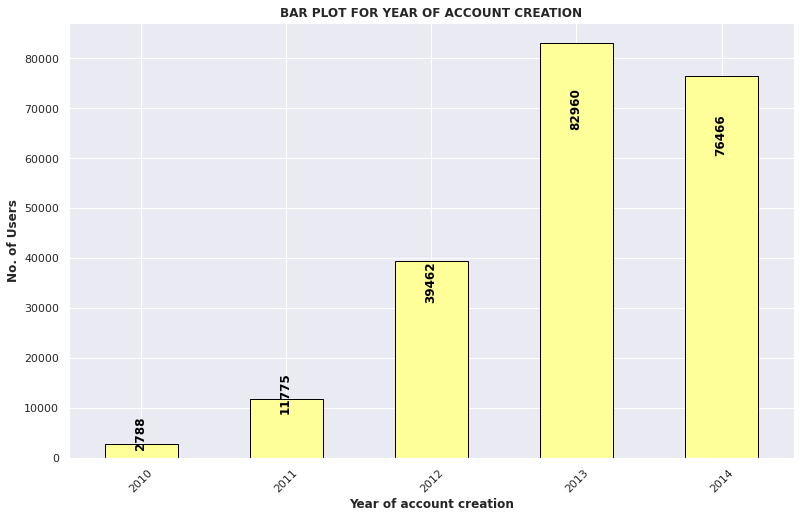

In [ ]:
#Plot that shows the distribution of users w.r.t their year of account creation:

plt.figure(figsize = (13,8))
labels = ['2010','2011','2012','2013','2014']
x = pd.Series(list(zip(*sorted(list(zip(train_session.year_account_created.value_counts().index,train_session.year_account_created.value_counts())))))[1])
m = x.index
sns.set(style="darkgrid")

ax_cd = x.plot(kind='bar', color = '#FFFF99',rot=45,edgecolor='black')
for p in ax_cd.patches:
    ax_cd.annotate(str(p.get_height()), (p.get_x()+0.2, p.get_height() * (0.8)),rotation=90,color='black',fontweight="bold")
plt.title('BAR PLOT FOR YEAR OF ACCOUNT CREATION',fontweight="bold")
plt.xlabel('Year of account creation',fontweight="bold")
plt.xticks(m, labels, rotation=45)
plt.ylabel('No. of Users',fontweight="bold")


**Observation:**

* 2013 records the highest number of accounts created.

* Year by year, the number of accounts created are increasing.

####**EXTRACTING FEATURES RELATED TO AGE**

In [ ]:
def age_buckets(feature):
  """
  Function that returns 0 for age group (19 - 39)
                        1 for age group (39 - 59)
                        2 for age group above 59
  """
  if feature >=19 and feature <=39:
    return 0
  elif feature >=40 and feature<=59:
    return 1
  else: 
    return 2

In [ ]:
#Extracting a new feature called age_bucket using the above pre-defined function.
train_session['age_bucket'] = train_session.apply(lambda x: age_buckets(x['age']), axis=1)

In [ ]:
train_session.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,first_device_type,first_browser,country_destination,secs_elapsed,activity,month_account_created,DayOfWeek_account_created,year_account_created,time_lag,age_bucket
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,34.0,facebook,0,direct,direct,untracked,...,Mac Desktop,Chrome,NDF,NaN,NaN,6,0,2010,-40246025.0,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,seo,google,untracked,...,Mac Desktop,Chrome,NDF,NaN,NaN,5,2,2011,-63180711.0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,direct,direct,untracked,...,Windows Desktop,IE,US,NaN,NaN,9,1,2010,-41042833.0,1
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,direct,direct,untracked,...,Mac Desktop,Firefox,other,NaN,NaN,12,0,2011,-66074311.0,1
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,direct,direct,untracked,...,Mac Desktop,Chrome,US,NaN,NaN,9,1,2010,-24169735.0,1


###**EXTRACTING FEATURES FROM THE SESSIONS ACTIVITY DATA:**

**DEALING WITH THE NULL VALUES IN ACTIVITY AND SECS_ELAPSED FEATURES**

In [6]:
#Replacing all the null values in activity with empty string and in secs_elapsed with 0.0

train_session.loc[train_session["activity"].isnull(), "activity"] = ''
train_session.loc[train_session["secs_elapsed"].isnull(), "secs_elapsed"] = 0.0

In [7]:
train_session.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
secs_elapsed               0
activity                   0
dtype: int64

In [ ]:
train_session.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,first_device_type,first_browser,country_destination,secs_elapsed,activity,month_account_created,DayOfWeek_account_created,year_account_created,time_lag,age_bucket
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,34.0,facebook,0,direct,direct,untracked,...,Mac Desktop,Chrome,NDF,0.0,,6,0,2010,-40246025.0,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,seo,google,untracked,...,Mac Desktop,Chrome,NDF,0.0,,5,2,2011,-63180711.0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,direct,direct,untracked,...,Windows Desktop,IE,US,0.0,,9,1,2010,-41042833.0,1
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,direct,direct,untracked,...,Mac Desktop,Firefox,other,0.0,,12,0,2011,-66074311.0,1
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,direct,direct,untracked,...,Mac Desktop,Chrome,US,0.0,,9,1,2010,-24169735.0,1


In [8]:
import ast
def string_to_list(feature):
  
  """ Function that converts a string into a list """
  
  if (feature == ''):
    feature = ''
  elif (feature == 0.0):
    feature = 0.0
  else:
    feature = ast.literal_eval(feature)
  return feature

In [9]:
#Applying a user-defined function to convert string into list
train_session['activity'] = train_session['activity'].apply(string_to_list)
train_session['secs_elapsed'] = train_session['secs_elapsed'].apply(string_to_list)

In [10]:
#Functions for Creating New features in Sessions dataset:

def action_summary(feature1,feature2):
  
  """ FUNCTION THAT TAKES ACTION AND SECS_ELAPSED AS INPUTS CORRESPONDING TO EACH USER AND 
      RETURNS A DICTIONARY WITH KEY AS THE ACTION SUBCATEGORIES AND 
      MEDIAN TIME SPENT BY USER IN PERFORMING THE ACTION SUBCATEGORY """
  
  if (feature1 == ''):
    return 0.0

  else:
    input_list = list(zip(feature1,feature2))
    dict_time = dict()  
    for feature,time in input_list:
        dict_time.setdefault(feature, []).append(time)
    for k,v in dict_time.items():
      dict_time[k] = st.median(v)
    return dict_time

# Functions for processing old features in Sessions dataset:

def convert_tostring(lists):

  """ FUNCTION THAT CONVERTS A ELEMENTS IN A LIST INTO A STRING OF VALUES SEPARATED BY COMMA """

  _string = [str(i) for i in lists]
  _string = ','.join(lists)
  return _string

def total_time_secs(lists):

  """ FUNCTION THAT TAKES LIST OF TIME IN SECONDS VALUES AND SUM THEM UP"""
  if (lists == 0.0):
    time_secs = lists
  else:
    lists = [float(i) for i in lists]
    time_secs = sum(lists)
  return time_secs


In [11]:
#Applying action_summary function on 'action' and 'secs_elapsed' features and creating a feature 'action_summary'
train_session['action_summary'] = train_session.apply(lambda x: action_summary(x['activity'],x['secs_elapsed']), axis=1)

#Creating feature 'action_no' that return number of actions performed by the user
train_session['actions_count'] = train_session.activity.apply(len)

#Applying user-defined function 'convert_tostring' on 'action' feature
train_session['activity'] = train_session['activity'].apply(convert_tostring)

#Applying user-defined function 'total_time_secs' on  'secs_elapsed' feature
train_session['secs_elapsed'] = train_session['secs_elapsed'].apply(total_time_secs)

In [ ]:
train_session.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,country_destination,secs_elapsed,activity,month_account_created,DayOfWeek_account_created,year_account_created,time_lag,age_bucket,action_summary,actions_count
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,34.0,facebook,0,direct,direct,untracked,...,NDF,0.0,,6,0,2010,-40246025.0,0,0.0,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,seo,google,untracked,...,NDF,0.0,,5,2,2011,-63180711.0,0,0.0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,direct,direct,untracked,...,US,0.0,,9,1,2010,-41042833.0,1,0.0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,direct,direct,untracked,...,other,0.0,,12,0,2011,-66074311.0,1,0.0,0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,direct,direct,untracked,...,US,0.0,,9,1,2010,-24169735.0,1,0.0,0


####**SELECTING ACTIONS BASED ON POPULARITY AND MEDIAN OF THE TIME SPENT BY THE USER:**

In [12]:
#https://www.youtube.com/watch?v=o4zEqZ8Aim4 
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

#Tokenining the strings in activity column to analyze the number of users who has done that action. 
fs = Tokenizer(filters=',')
fs.fit_on_texts(train_session.activity.values)

#Tokenining the strings in activity column to analyze the number of users who has done that action and whose country destination is NDF.
ndf = Tokenizer(filters=',')
ndf.fit_on_texts(train_session[train_session['country_destination']=='NDF'].activity.values)

#Tokenining the strings in activity column to analyze the number of users who has done that action and whose country destination is not NDF.
df = Tokenizer(filters=',')
df.fit_on_texts(train_session[train_session['country_destination']!='NDF'].activity.values)

In [ ]:
Full_set = set(fs.word_docs.keys())
NDF_set = set(ndf.word_docs.keys())
DF_set = set(df.word_docs.keys())
print("Number of unique actions in total: {}".format(len(Full_set)))
print("Number of unique actions done by users who didn't choose a destination: {}".format(len(NDF_set)))
print("Number of unique actions done by users who did choose a destination: {}".format(len(DF_set)))

Number of unique actions in total: 401
Number of unique actions done by users who didn't choose a destination: 375
Number of unique actions done by users who did choose a destination: 366


In [13]:
#Creating a DataFrame with action and number of users who performed it as columns:
data_fs = pd.DataFrame({'action':fs.word_docs.keys(), 'users_count':fs.word_docs.values()})
data_fs.head(5)

,action,users_count
0,index_view_search_results_view,31902
1,lookup_no_detail_no_type,20380
2,show_no_detail_no_type,46016
3,header_userpic_header_userpic_data,56853
4,other_hosting_reviews_first_-unknown-_-unknown-,10492


In [14]:
#Creating a DataFrame with action and median of median time spent by all users to perform it as columns:
  
median_time = dict()
for i in train_session['action_summary'].values:
  if (i==0.0):
    pass
  else:
    for k in data_fs.action.unique():
      if (k in i.keys()):
        
        if median_time.get(k) == None:
          median_time[k] = [i.get(k)]
        else:
          median_time[k] += [i.get(k)]

for k,v in median_time.items():
    median_time[k] = st.median(v)

time = pd.DataFrame({'action':median_time.keys(),'median_of_median_time':median_time.values()})
time.head(5)

,action,median_of_median_time
0,index_view_search_results_view,12098.5
1,lookup_no_detail_no_type,614.5
2,show_no_detail_no_type,98.0
3,header_userpic_header_userpic_data,852.0
4,other_hosting_reviews_first_-unknown-_-unknown-,110.0


In [15]:
#Merging the above 2 dataFrames and creating 2 more columns with the ranks for actions with respect to popularity and median time

data_fs = data_fs.merge(time, left_on='action', right_on='action', how='inner')
data_fs.sort_values('users_count', ascending=False,inplace=True)
data_fs['Popularity_rank'] = data_fs['users_count'].rank()
data_fs.sort_values('median_of_median_time', ascending=False,inplace=True)
data_fs['Median_time_rank'] = data_fs['median_of_median_time'].rank()
data_fs

,action,users_count,median_of_median_time,Popularity_rank,Median_time_rank
352,views_campaign_-unknown-_-unknown-,2,594896.0,41.5,401.0
350,email_by_key_-unknown-_-unknown-,1,544224.0,17.5,400.0
160,recommend_-unknown-_-unknown-,247,396976.0,220.0,399.0
72,12_message_post_message_post,647,302793.0,261.0,398.0
255,payoneer_signup_complete_-unknown-_-unknown-,18,265752.5,106.0,397.0
...,...,...,...,...,...
386,open_hard_fallback_modal_-unknown-_-unknown-,1,17.0,17.5,5.0
373,apply_coupon_error_type_-unknown-_-unknown-,170,1.0,199.5,4.0
20,create_create_user_submit,32480,0.0,395.0,2.0
227,create_signup_submit,8575,0.0,365.0,2.0


In [16]:
#Choosing the actions which majority of the users have performed and spent a decently good time in performing it.

important_words = data_fs['action'][(data_fs['Popularity_rank']> 100) & (data_fs['Median_time_rank']> 100)].tolist()
print("The number of actions which are considered important are {}".format(len(important_words)))
print('\nThe actions are\n',important_words)

The number of actions which are considered important are 215

The actions are
 ['recommend_-unknown-_-unknown-', '12_message_post_message_post', 'payoneer_signup_complete_-unknown-_-unknown-', 'ajax_send_message_-unknown-_-unknown-', 'submit_contact_-unknown-_-unknown-', 'jumio_redirect_-unknown-_-unknown-', 'become_user_-unknown-_-unknown-', 'jumio_-unknown-_-unknown-', 'set_password_set_password_submit', 'other_hosting_reviews_-unknown-_-unknown-', 'this_hosting_reviews_listing_reviews_page_click', '10_message_post_message_post', 'languages_multiselect_-unknown-_-unknown-', 'webcam_upload_-unknown-_-unknown-', 'upload_-unknown-_-unknown-', '11_message_post_message_post', 'concierge_-unknown-_-unknown-', '15_message_post_message_post', 'message_to_host_change_message_to_host_change_click', 'ajax_image_upload_-unknown-_-unknown-', 'press_release_-unknown-_-unknown-', 'confirm_email_confirm_email_link_click', 'review_page_-unknown-_-unknown-', 'update_update_listing_description_submit',

In [17]:
def removing_redundant_words(feature):
  """
  Function that removes the redundant actions from the strings in activity column
  
  """
  if (len(feature)==0):
    feature = ''
  else:
    feature = feature.split(',')
    L = []
    for i in important_words:
      for k in feature:
        if (k==i):
          L.append(i)
    feature = ','.join(L)
  return feature

In [18]:
train_session.activity[1]

''

In [19]:
train_session.activity[198888]

'notifications_notifications_submit,collections_user_wishlists_view,recommendations_listing_recommendations_data,show_user_profile_view,show_no_detail_no_type,update_update_user_submit,search_view_search_results_click,search_view_search_results_click,index_reservations_data,campaigns_no_detail_no_type,show_no_detail_no_type,active_-unknown-_-unknown-,domains_-unknown-_-unknown-,collections_user_wishlists_view,collections_user_wishlists_view,show_p3_view,social_connections_user_social_connections_data,index_-unknown-_-unknown-,show_user_profile_view,recommendations_listing_recommendations_data,payment_instruments_payment_instruments_data,unavailabilities_unavailable_dates_data,collections_user_wishlists_view,show_p3_view,social_connections_user_social_connections_data,show_user_profile_view,index_-unknown-_-unknown-,recommendations_listing_recommendations_data,payment_instruments_payment_instruments_data,unavailabilities_unavailable_dates_data,collections_user_wishlists_view,search_view

In [20]:
#Applying the above function to remove redundant words
train_session['activity'] = train_session['activity'].apply(removing_redundant_words)

In [21]:
train_session.activity[1]

''

In [22]:
train_session.activity[198888]

'search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_view_search_results_click,search_vi

In [ ]:
train_session.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,country_destination,secs_elapsed,activity,month_account_created,DayOfWeek_account_created,year_account_created,time_lag,age_bucket,action_summary,actions_count
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,34.0,facebook,0,direct,direct,untracked,...,NDF,0.0,,6,0,2010,-40246025.0,0,0.0,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,seo,google,untracked,...,NDF,0.0,,5,2,2011,-63180711.0,0,0.0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,direct,direct,untracked,...,US,0.0,,9,1,2010,-41042833.0,1,0.0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,direct,direct,untracked,...,other,0.0,,12,0,2011,-66074311.0,1,0.0,0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,direct,direct,untracked,...,US,0.0,,9,1,2010,-24169735.0,1,0.0,0


####**NEW FEATURE: USEFUL ACTIVITY LEVEL**

In [ ]:
def useful_activity_rating(feature1,feature2):
  """
  Function that returns useful activity level ie., (No.of Useful actions performed/Total number of actions performed)

  """
  x1 = len(feature1.split(','))
  if (feature2 == 0):
    return 0.000
  else:
    return np.round((x1/feature2),3)

In [ ]:
train_session['useful_activity_rating'] = train_session.apply(lambda x: useful_activity_rating(x['activity'],x['actions_count']), axis=1)

In [ ]:
train_session.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,secs_elapsed,activity,month_account_created,DayOfWeek_account_created,year_account_created,time_lag,age_bucket,action_summary,actions_count,useful_activity_rating
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,34.0,facebook,0,direct,direct,untracked,...,0.0,,6,0,2010,-40246025.0,0,0.0,0,0.0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,seo,google,untracked,...,0.0,,5,2,2011,-63180711.0,0,0.0,0,0.0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,direct,direct,untracked,...,0.0,,9,1,2010,-41042833.0,1,0.0,0,0.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,direct,direct,untracked,...,0.0,,12,0,2011,-66074311.0,1,0.0,0,0.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,direct,direct,untracked,...,0.0,,9,1,2010,-24169735.0,1,0.0,0,0.0


In [ ]:
#Dropping action_summary feature
train_session.drop(['action_summary'],axis=1,inplace=True)

In [ ]:
ABCD = train_session

In [ ]:
train_session.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,country_destination,secs_elapsed,activity,month_account_created,DayOfWeek_account_created,year_account_created,time_lag,age_bucket,actions_count,useful_activity_rating
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,34.0,facebook,0,direct,direct,untracked,...,NDF,0.0,,6,0,2010,-40246025.0,0,0,0.0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,seo,google,untracked,...,NDF,0.0,,5,2,2011,-63180711.0,0,0,0.0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,direct,direct,untracked,...,US,0.0,,9,1,2010,-41042833.0,1,0,0.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,direct,direct,untracked,...,other,0.0,,12,0,2011,-66074311.0,1,0,0.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,direct,direct,untracked,...,US,0.0,,9,1,2010,-24169735.0,1,0,0.0


##**PRE-PROCESSING DATA**

###**ENCODING CATEGORICAL FEATURES USING ONE HOT ENCODING TECHNIQUE:**



In [ ]:
ohe_list = ['gender', 'signup_method','affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked','signup_app','first_device_type', 'first_browser']
features = []
new_train = pd.DataFrame()
for feature in ohe_list:
    train_ = pd.get_dummies(train_session[feature], prefix = feature)
    features += train_.columns.tolist()
    new_train = pd.concat((new_train, train_), axis=1) 
    

###**APPLYING TF-IDF FOR ACTIVITY COLUMN:**

In [ ]:
def tokens(x):
        
    """  Function takes strings and tokenises using comma.    """
        
    return x.split(',')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1,1),tokenizer=tokens,max_features=3000)
vectorizer_tfidf.fit(train_session['activity'])

TfidfVectorizer(max_features=3000,
                tokenizer=<function tokens at 0x7f932c161170>)

In [ ]:
tr_action_tfidf = vectorizer_tfidf.transform(train_session['activity'].values).toarray()

In [ ]:
tr_action_tfidf.shape

(213451, 216)

In [ ]:
#Saving the vectorizer
import pickle
pickle.dump(vectorizer_tfidf,open('/content/drive/MyDrive/DataSets/vectorizer_tfidf','wb'))

In [ ]:
features += vectorizer_tfidf.get_feature_names()

###**STANDARDIZING THE NUMERICAL FEATURE:**

In [ ]:
features += ['secs_elapsed','time_lag','age','signup_flow','dayoftheweek_account_created','month_account_created','year_account_created','useful_activity_rating','age_bucket','actions_count']

In [ ]:
from sklearn import preprocessing
scaler_secs = preprocessing.StandardScaler().fit(train_session['secs_elapsed'].values.reshape(-1,1))
train_session_secs = scaler_secs.transform(train_session['secs_elapsed'].values.reshape(-1,1))

In [ ]:
#pickle.dump(scaler_secs,open('/content/drive/MyDrive/DataSets/scaler_secs','wb'))

In [ ]:
from sklearn import preprocessing
scaler_timelag = preprocessing.StandardScaler().fit(train_session['time_lag'].values.reshape(-1,1))
train_session_time_lag = scaler_timelag.transform(train_session['time_lag'].values.reshape(-1,1))

In [ ]:
#pickle.dump(scaler_timelag,open('/content/drive/MyDrive/DataSets/scaler_timelag','wb'))

In [ ]:
train_session_age = train_session['age'].values.reshape(-1,1)
train_session_flow = train_session['signup_flow'].values.reshape(-1,1)
train_session_create_day = train_session['DayOfWeek_account_created'].values.reshape(-1,1)
train_session_create_month = train_session['month_account_created'].values.reshape(-1,1)
train_session_create_year = train_session['year_account_created'].values.reshape(-1,1)
train_session_useful_activity_rating = train_session['useful_activity_rating'].values.reshape(-1,1)
train_session_age_bucket = train_session['age_bucket'].values.reshape(-1,1)
train_session_actions_count = train_session['actions_count'].values.reshape(-1,1)

###**ENCODING COUNTRY DESTINATION FEATURE AND STACKING UP FEATURES:** 

In [ ]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
y_t = label_encoder.fit(train_session['country_destination'])
y_tr = y_t.transform(train_session['country_destination'])
y_tr=y_tr.reshape(-1,1)
print(y_tr)

[[ 7]
 [ 7]
 [10]
 ...
 [ 7]
 [ 7]
 [ 7]]


In [ ]:
#pickle.dump(y_t,open('/content/drive/MyDrive/DataSets/label_encoder','wb'))


In [ ]:
#Stacking up the features:

from scipy import sparse
from scipy.sparse import hstack
import numpy as np
train_set_final = np.hstack((new_train.to_numpy(),tr_action_tfidf,train_session_secs,train_session_time_lag,train_session_age, train_session_flow,train_session_create_day,train_session_create_month,train_session_create_year,train_session_useful_activity_rating,train_session_age_bucket,train_session_actions_count))
X_tr = sparse.csr_matrix(train_set_final)

print("Final Data matrix")
print(X_tr.shape,y_tr.shape)

Final Data matrix
(213451, 315) (213451, 1)


###**CREATING DATAFRAME TO STORE PREPROCESSED VALUES AND SAVE IT INTO CSV FILE:**

In [ ]:
#Creating a Dataframe to store preprocessed values:
X_trn1 = pd.DataFrame(train_set_final,columns=features)
X_trn1['y_tr'] = y_tr

In [ ]:
X_trn1.head(5)

,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,...,time_lag,age,signup_flow,dayoftheweek_account_created,month_account_created,year_account_created,useful_activity_rating,age_bucket,actions_count,y_tr
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-38.998272,34.0,0.0,0.0,6.0,2010.0,0.0,0.0,0.0,7
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-61.207648,38.0,0.0,2.0,5.0,2011.0,0.0,0.0,0.0,7
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-39.769881,56.0,3.0,1.0,9.0,2010.0,0.0,1.0,0.0,10
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-64.009738,42.0,0.0,0.0,12.0,2011.0,0.0,1.0,0.0,11
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-23.430395,41.0,0.0,1.0,9.0,2010.0,0.0,1.0,0.0,10


In [ ]:
X_trn1.to_csv(r'/content/drive/MyDrive/DataSets/Pre_Processed_train.csv', index = False)

In [ ]:
import shutil
from shutil import make_archive
shutil.make_archive("/content/drive/MyDrive/session_dataset", 'zip', '/content/drive/MyDrive')


'/content/drive/MyDrive/session_dataset.zip'